## Завдання

In [ ]:
    Ви - аналітик у продуктовій ІТ-компанії. На платформі стався технічний збій, який може мати вплив на виручку.
Збій стався 16 травня 2024 і його наслідки тривають досі.
    Вам потрібно оцінити потенційне зменшення виручки внаслідок збою. При цьому варто врахувати, що на
виручку можуть впливати багато інших факторів. Серед них:
        • впродовж цього періоду змінювалася структура користувачів та рекламні бюджети;
        • з 15 березня проводився великий спліт-тест;
        • в кінці березня зменшилася команда підтримки;
        • на початку квітня змінилися логіки роботи з листами;
        • у середині квітня відбувся реліз нової OS;
        • у виручки може бути циклічність.

    Потрібно знайти якомога більше релевантних факторів, оцінити і врахувати їх вплив. Після цього визначити, на
скільки зменшив виручку саме технічний збій 16 травня.

## Початок роботи

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pycaret.regression as reg

import statsmodels.api as sm

In [2]:
df = pd.read_csv("C:\\Users\\ASUS-X515EP\\Downloads\\Telegram Desktop\\analytics_test_case.csv")
df.head()

,date,users,revenue,split_group,gender,os_version,age_group,country_group
0,2024-03-01,1077,3770.39,NaN,male,1,45+,USA
1,2024-03-01,744,1060.22,NaN,male,1,45+,Tier_1
2,2024-03-01,657,979.49,NaN,male,1,45+,Other
3,2024-03-01,251,548.77,NaN,male,1,45-,USA
4,2024-03-01,143,604.85,NaN,male,1,45-,Tier_1


## All Visualizations

### Графіки

In [65]:
# Function to vis events
def viz(y, hue, title):
    sns.set_style('dark')
    fig, ax = plt.subplots(figsize=(18.5, 5))
    sns.lineplot(
        data=df,
        x='date',
        y=y,
        hue=hue,
        estimator='sum',
        ax=ax,
        ci=None)
    plt.xticks(rotation=90)
    ax.axvline(x='2024-03-15', color='r', label='A/B', linestyle='--', linewidth=2)
    ax.axvline(x='2024-04-01', color='b', label='List Change', linestyle='--', linewidth=2)
    ax.axvline(x='2024-04-15', color='y', label='New OS', linestyle='--', linewidth=2)
    ax.axvline(x='2024-04-29', color='g', label='Support Change', linestyle='--', linewidth=2)
    ax.axvline(x='2024-05-16', color='m', label='Anomaly', linestyle='--', linewidth=3)
    plt.title(title)
    plt.legend()
    # plt.ylim((25000, 35000))
    plt.show()

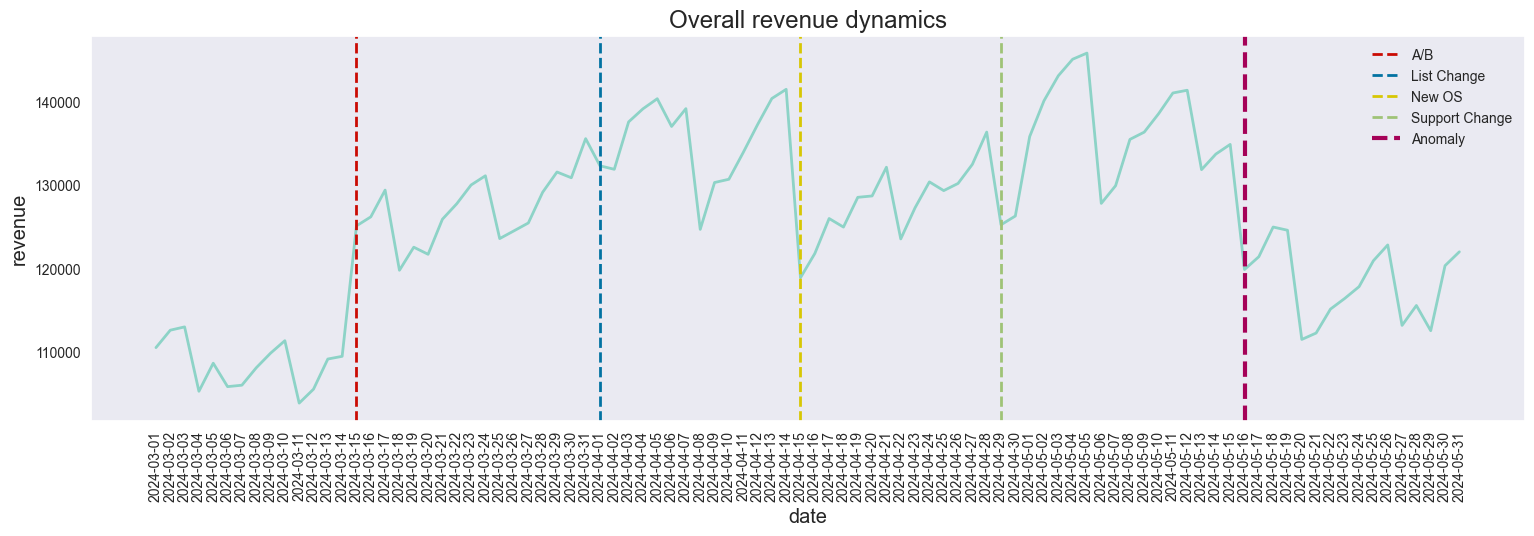

In [66]:
viz('revenue', None, 'Overall revenue dynamics')

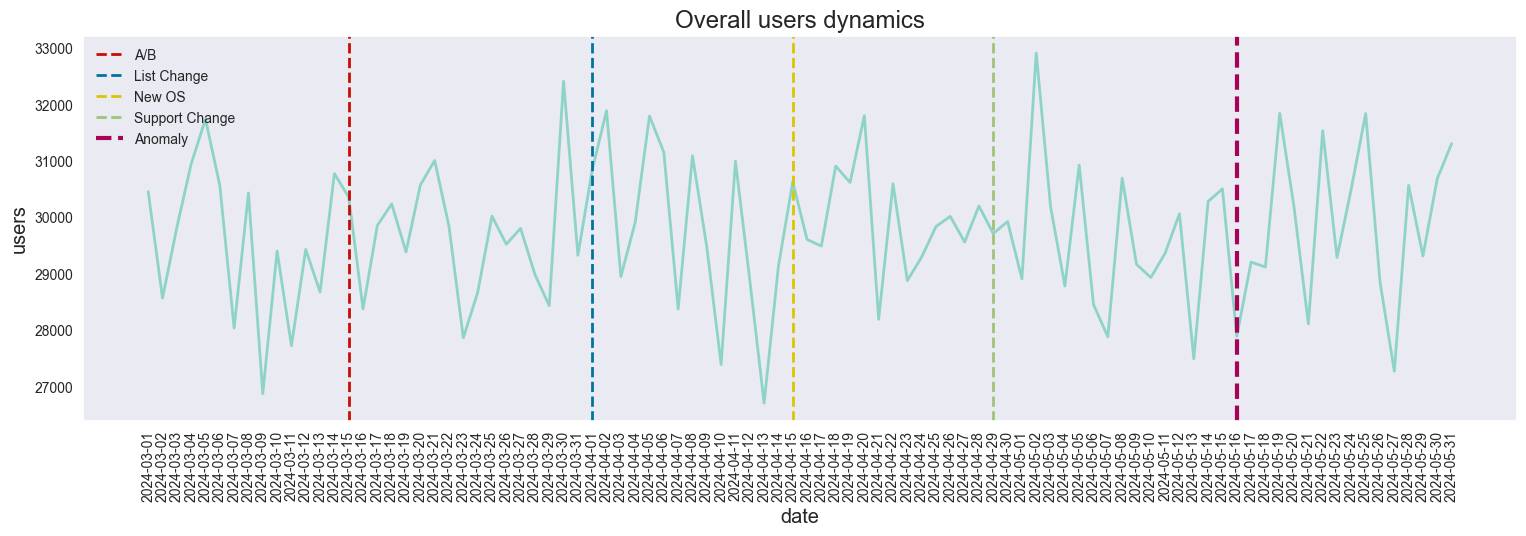

In [64]:
viz('users', None, 'Overall users dynamics')

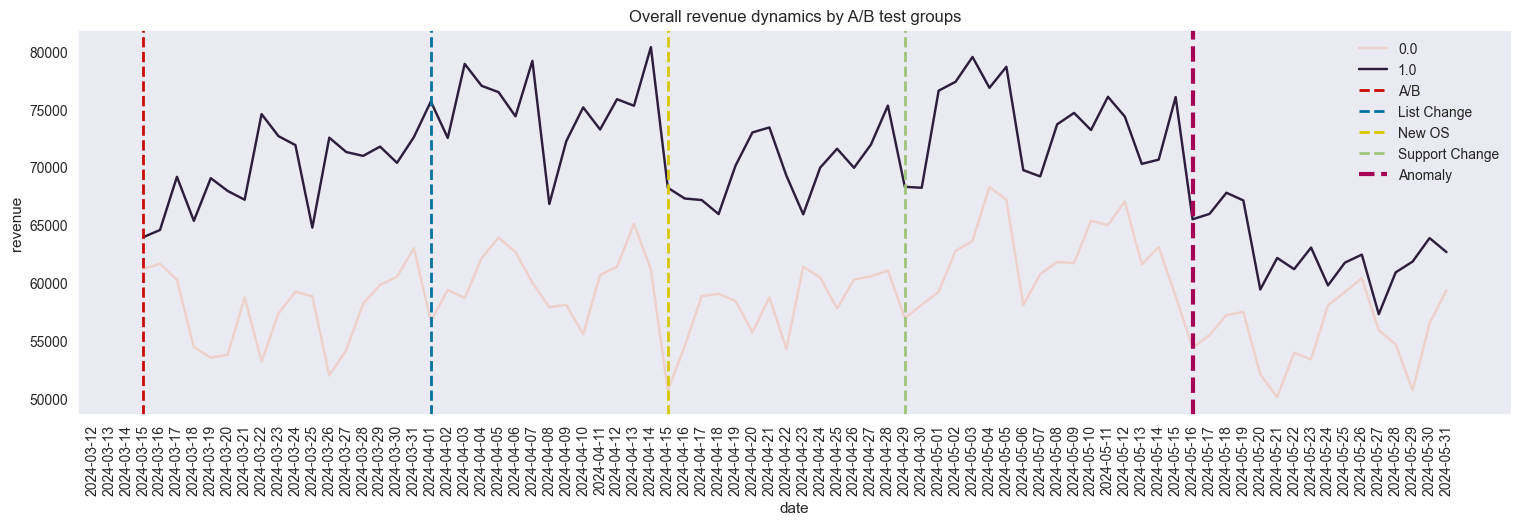

In [6]:
viz('revenue', 'split_group', 'Overall revenue dynamics by A/B test groups')

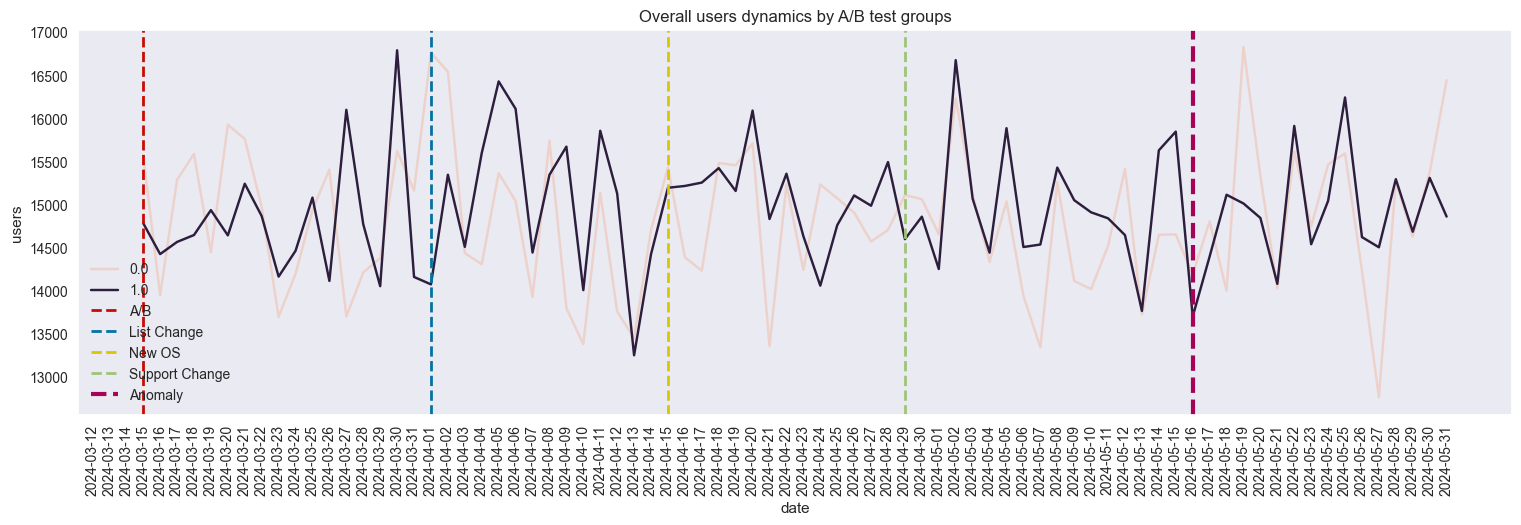

In [7]:
viz('users', 'split_group', 'Overall users dynamics by A/B test groups')

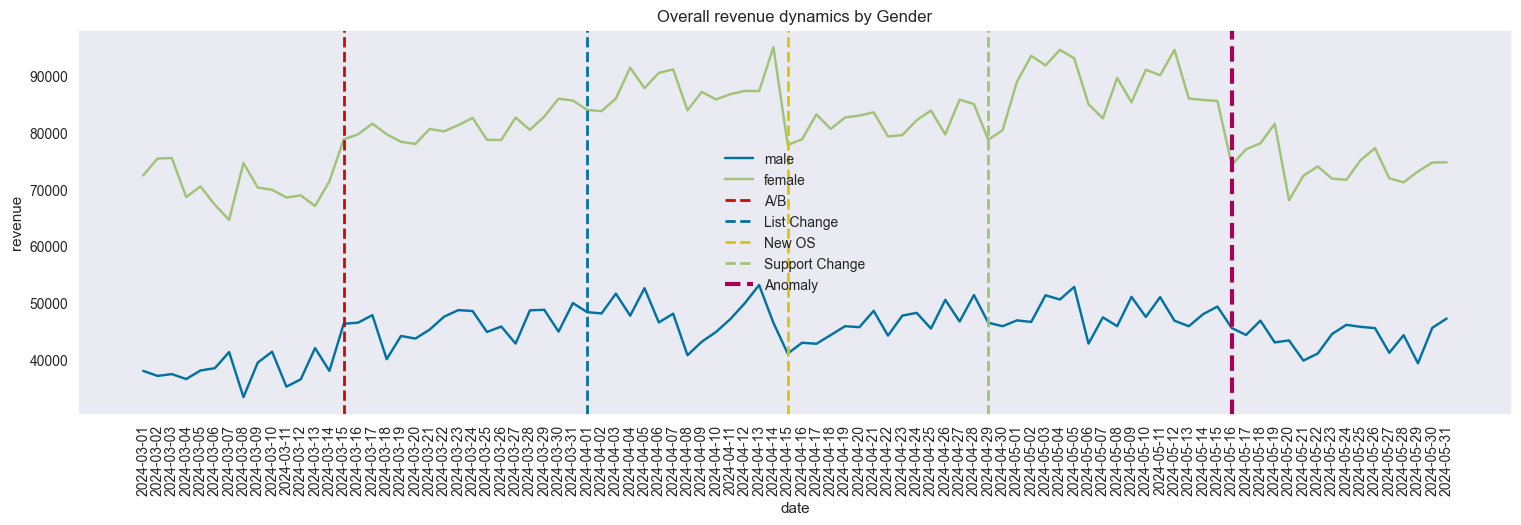

In [8]:
viz('revenue', 'gender', 'Overall revenue dynamics by Gender')

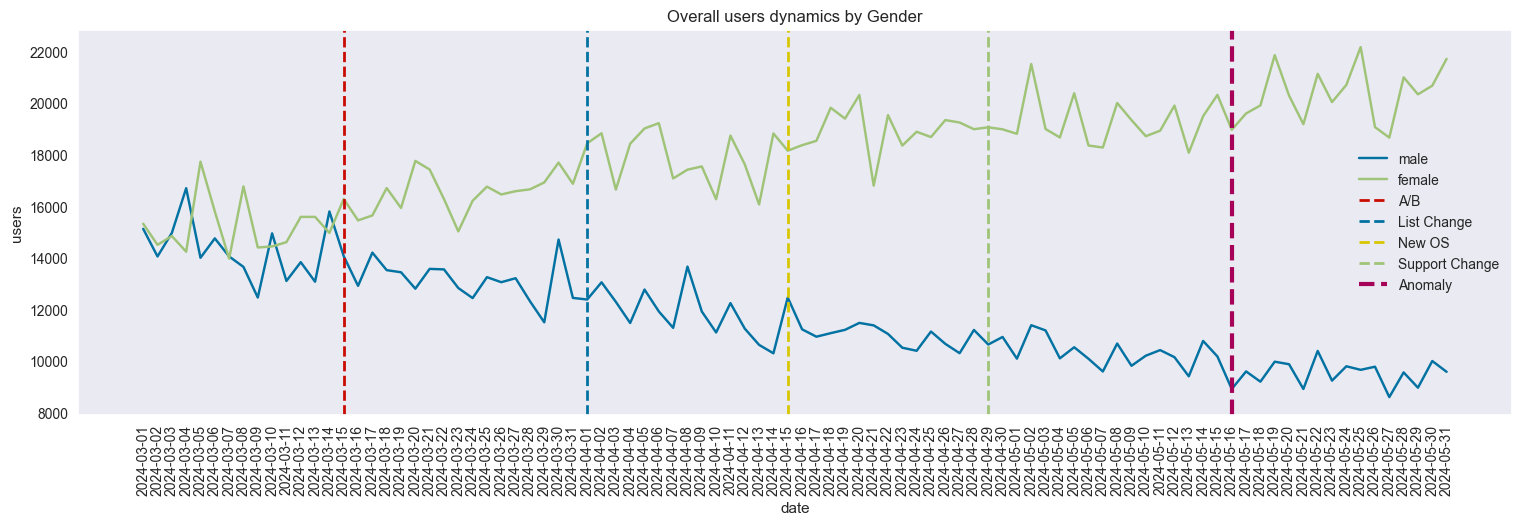

In [9]:
viz('users', 'gender', 'Overall users dynamics by Gender')

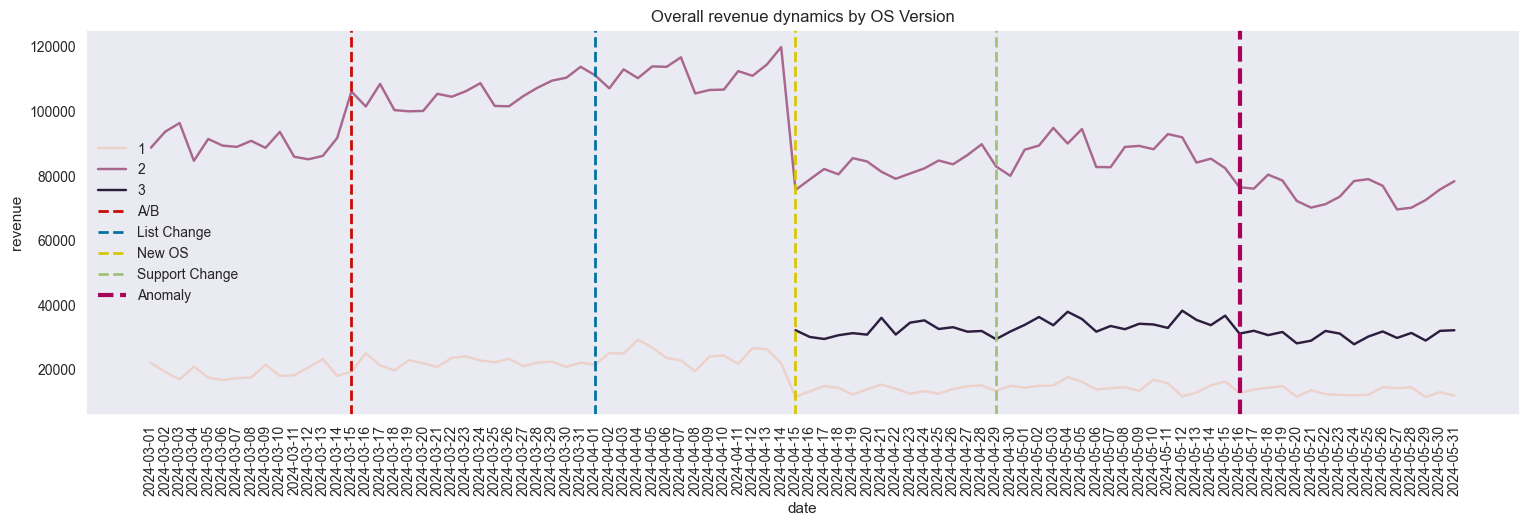

In [10]:
viz('revenue', 'os_version', 'Overall revenue dynamics by OS Version')

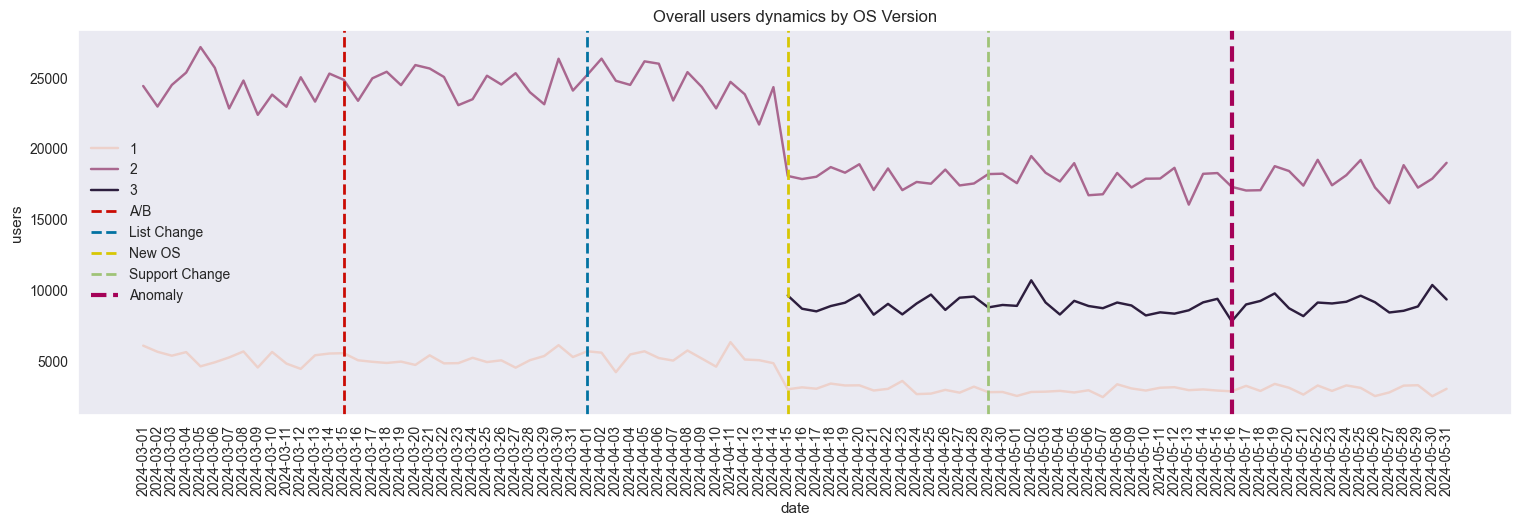

In [11]:
viz('users', 'os_version', 'Overall users dynamics by OS Version')

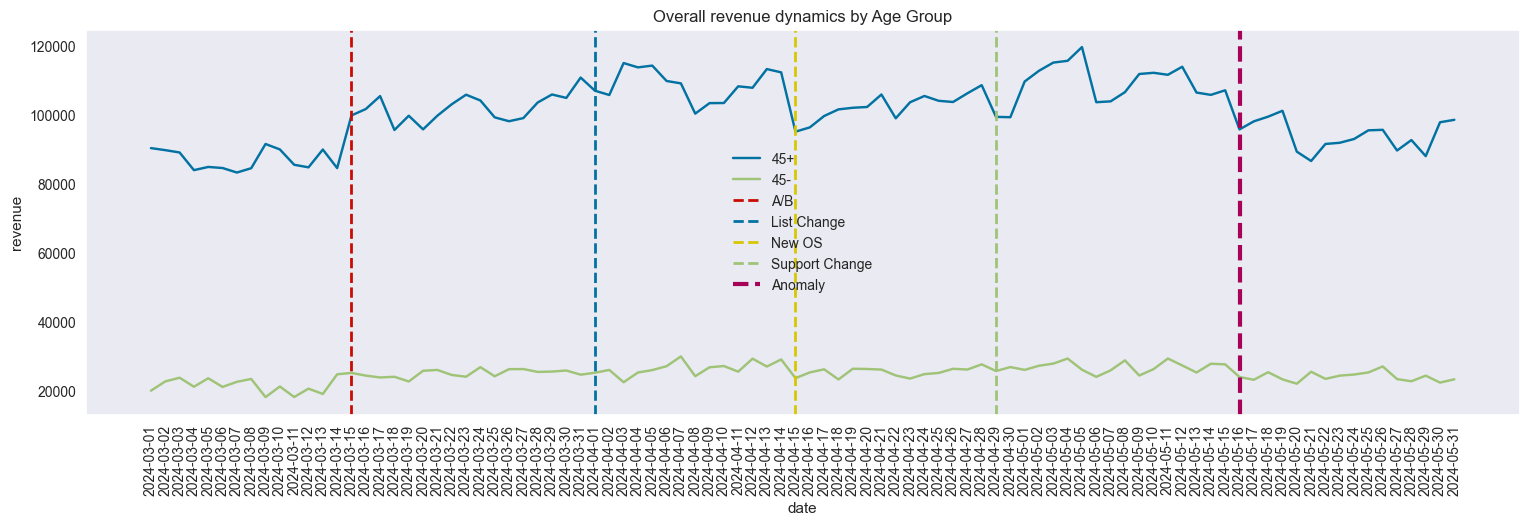

In [12]:
viz('revenue', 'age_group', 'Overall revenue dynamics by Age Group')

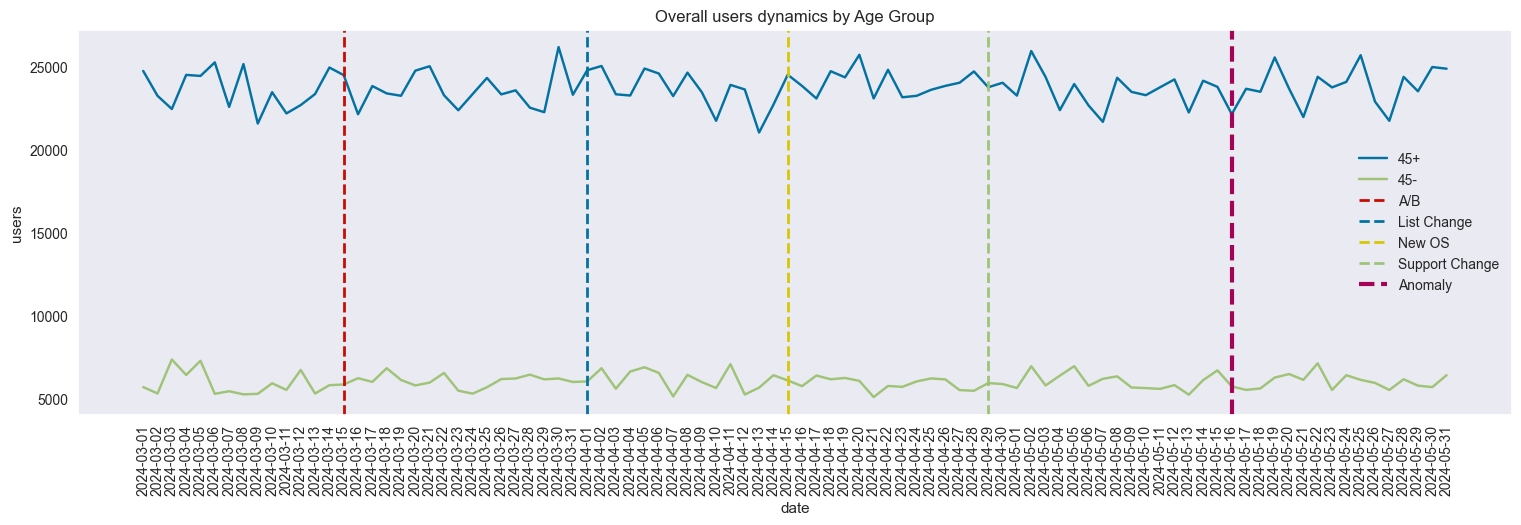

In [13]:
viz('users', 'age_group', 'Overall users dynamics by Age Group')

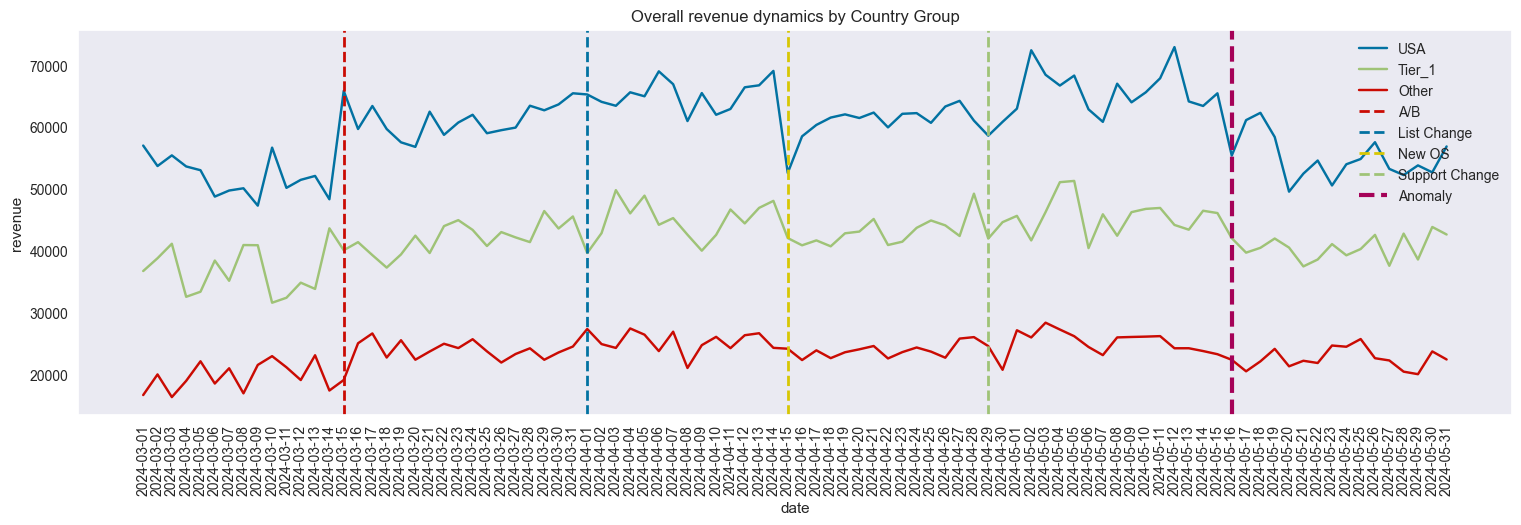

In [14]:
viz('revenue', 'country_group', 'Overall revenue dynamics by Country Group')

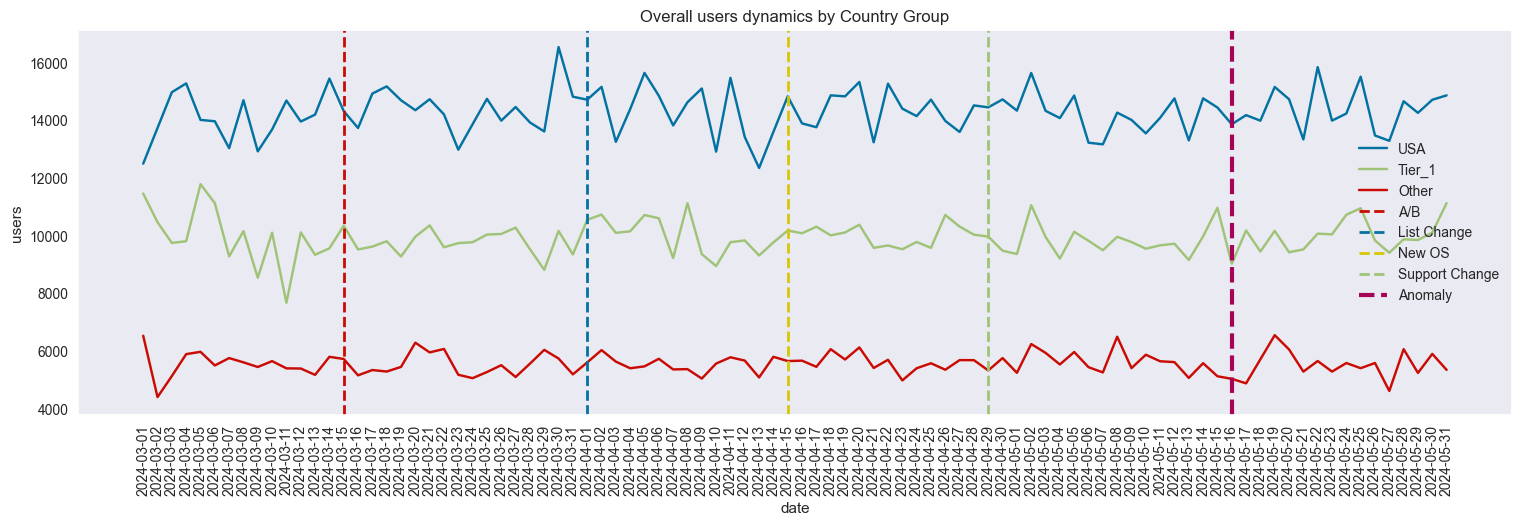

In [15]:
viz('users', 'country_group', 'Overall users dynamics by Country Group')

### Висновок

In [ ]:
Аналіз до аномалії
    
Правка:
    Логіку листування та зменшення підтримки враховувати не буду, бо результати сфабриковані сезонністю.
    
Загалом:
 1. Виручка: виросла під час А/Б тесту; впала, коли зʼявилася нова OS.
 2. Аудиторія: взагалі не реагує на події.

А/Б тест:
 1. Виручка: коли зʼявилася нова OS - впала; в моменті зреагувала на зменшення підтримки.
 2. Аудиторія: ряд майже стаціонарний для двох груп.
 3. Структура: більше заробіток у групи 1; за розміром однакові.

Стать:
 1. Виручка: зросла під час А/Б тесту; впала, коли зʼявилася нова OS.
 2. Аудиторія: чоловіча аудиторія постійно падає, жіноча навпаки.
 3. Структура: жінки більше витрачають, аніж чоловіки; жіноча аудиторія постійно росте, на відміну від чоловічої.

OS:
 1. Виручка: впала для «1» та «2» ОС, після появи 3-го, бо ліквідність перейшла до неї.
 2. Аудиторія: впала для «1» та «2» ОС, після появи 3-го, бо частина аудиторії перейшла на 3-тю.
 3. Структура: виручка почала значно падати для для 2-го ОС й для інших також, але менше; 
        кожен з рядів схожий на стаціонарний (у 2-ої набільше аудиторії, 3-тя замає спевнену середину, а 1-а займає найменшу частку).

Вік:
 1. Виручка: після появи нової ОС спала.
 2. Аудиторія: не реагує.
 3. Структура: виручка з "45+" більше, ніж у "45-"; аудиторії в "45+" більше, ніж у "45-".

Країни:
 1. Виручка: після появи нової ОС спала.
 2. Аудиторія: не реагує.
 3. Структура: США більше приносить грошей, Європа також багато, "інші" найменше; 
        США найбільше має користувачів, Європа також багато, "інші" найменше.



Після аномалії:

Загалом: 
 1. Виручка: значно впала.
 2. Аудиторія: стаціонарно.

А/Б:
 1. Виручка: в тестовій групі впала більш значно, аніж у контрольній, майже вирівнявшись з нею, але проблема стосується обох.

Гендер: 
 1. Виручка: впала більш значно у жінок, ніж у чоловіків.

ОС:
 1. Виручка: 2-ий ОС найбільше відчув вплив.

Вік: 
 1. Виручка: група «45+» відчула біль значно більше.

Країна:
 1. Виручка: у США впала найбільше.

## Дослідження сезонності

### Візуалізації

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [69]:
df_s = df.groupby('date').revenue.sum()
df_s.head()

date
2024-03-01    110486.59
2024-03-02    112579.29
2024-03-03    112977.09
2024-03-04    105240.24
2024-03-05    108615.19
Name: revenue, dtype: float64

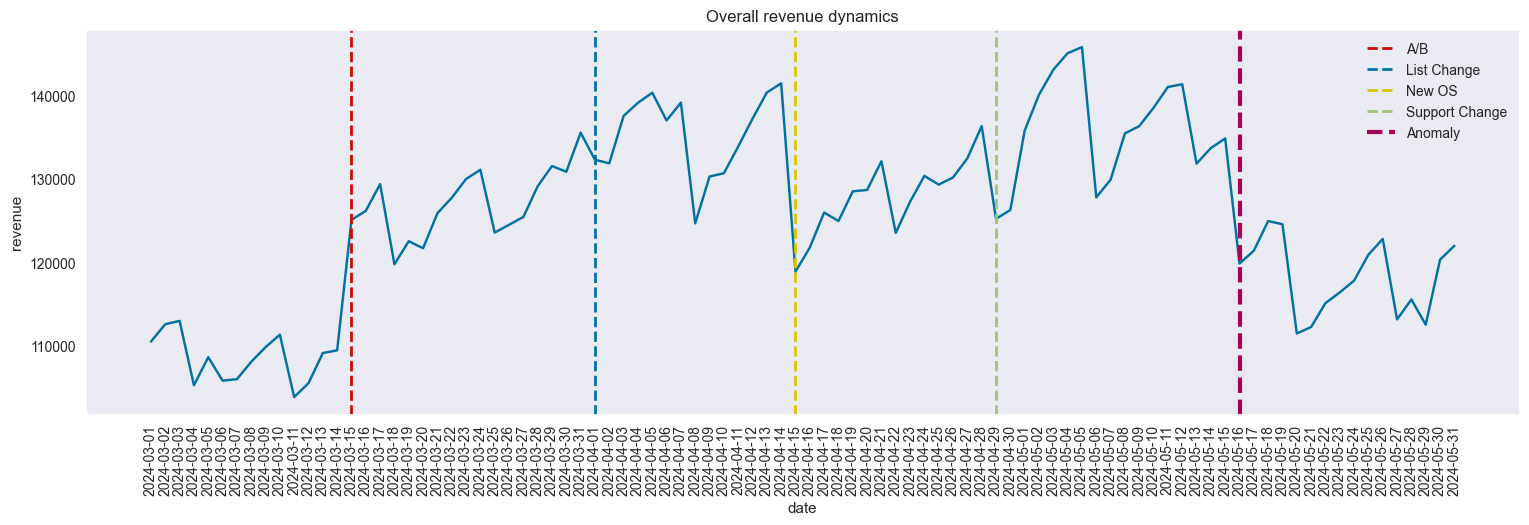

In [36]:
viz('revenue', None, 'Overall revenue dynamics')
# Циклічність на графіку присутня.

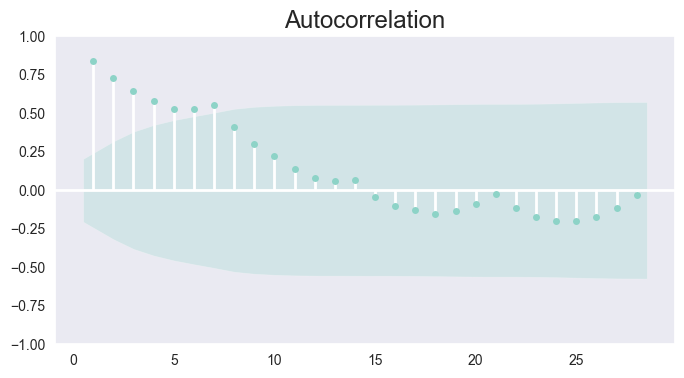

In [70]:
# Зображаю ACF для знаходження сезонності по днях.
fig, (ax1) = plt.subplots(1,1,figsize=(8,4))
plot_acf(df_s,
        lags=28,
        zero=False,
        ax=ax1)
plt.show()
# Маємо тижневу сезонність зі значущими затримками до семи днів. 
# Далі можемо спосерігати теж сезонність й позитивану та негативну автокореляція, яка є невпливовою.

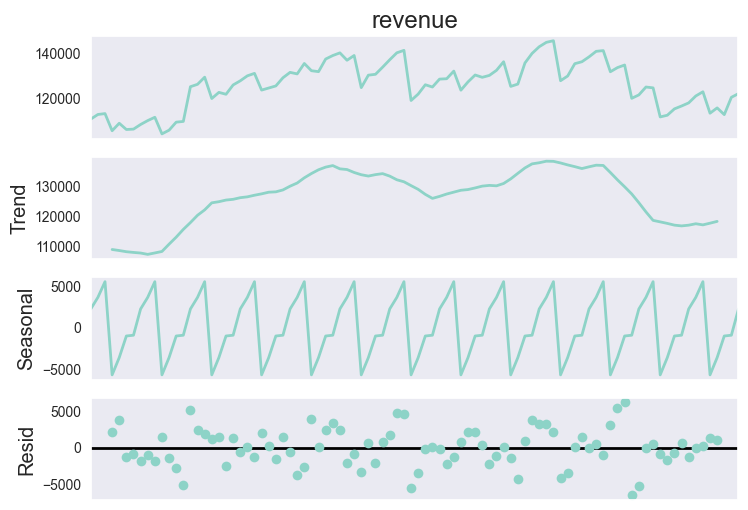

In [91]:
# Щотижнева сезонність
decomp = seasonal_decompose(df_s,
                            period=7)
decomp.plot()
plt.xticks([])
plt.show()
# Тренд був позитивним до аномалії й сезонність справді складає 7 днів.

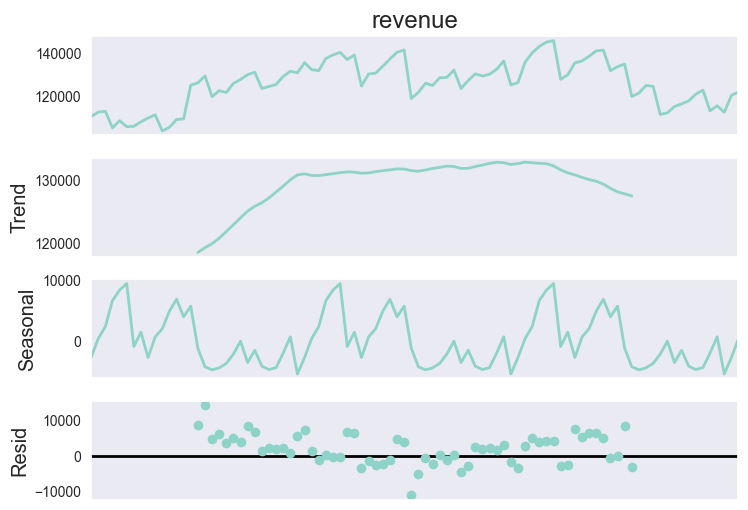

In [93]:
# Вивчаю щомісячну сезонність
decomp = seasonal_decompose(df_s,
                            period=30)
decomp.plot()
plt.xticks([])
plt.show()

### Висновок

## Оцінка факторів впливу на прибуток.

### Робота над моделлю

In [14]:
# Змінюю тип даних.
df_ml = df.copy()
df_ml['split_group'] = df_ml['split_group'].fillna(2)
df_ml['date'] = pd.to_datetime(df_ml['date'])
df_ml['split_group'] = df_ml['split_group'].astype('category')
df_ml['os_version'] = df_ml['os_version'].astype('category')
df_ml['country_group'] = df_ml['country_group'].astype('category')
df_ml['sex_age'] = df_ml['gender'].astype('string') + '_' + df_ml['age_group'].astype('string')
df_ml['sex_age'] = df_ml['sex_age'].astype('category')

In [15]:
# Сторюю нові ознаки.
df_ml['day_of_week'] = df_ml['date'].dt.day_name()
df_ml['day'] = df_ml['date'].dt.day
df_ml.sample()

,date,users,revenue,split_group,gender,os_version,age_group,country_group,sex_age,day_of_week,day
5035,2024-05-29,1731,5173.55,0.0,female,2,45+,Tier_1,female_45+,Wednesday,29


In [16]:
# Розділяю на тестову та трейн датасети (до аномалії та після) для оцінки потенційних збитків.
train = df_ml[(df_ml['date']<'2024-05-16')]
test = df_ml[df_ml['date']>='2024-05-16']

train.sample(3)

,date,users,revenue,split_group,gender,os_version,age_group,country_group,sex_age,day_of_week,day
3481,2024-05-08,198,626.10,0.0,male,1,45+,Tier_1,male_45+,Wednesday,8
1595,2024-04-10,126,836.26,0.0,male,2,45-,Other,male_45-,Wednesday,10
3147,2024-05-03,371,1544.03,1.0,male,2,45-,USA,male_45-,Friday,3


In [ ]:
# Налаштовую модель
# Не включав до моделі останні два тижні, бо й так зрозуміло, що аномалія має значнний вплив.
reg_setup = reg.setup(
                data=train,
                target='revenue',
                numeric_features=['day', 'users'],
                ignore_features=['date', 'gender', 'age_group'],
                categorical_features=['split_group', 'os_version', 'country_group', 'sex_age'],
                ordinal_features = {'day_of_week' : ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']},
#                                     'age_group': ['45-', '45+'],
#                                     'gender': ['male', 'female']},
                preprocess=True,
                use_gpu=True,
                n_jobs=-1,
                session_id=9540,
                fold_shuffle=True,
                fold=5
                )

In [7]:
reg.compare_models(turbo=True, exclude=['catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,465.9033,601249.6046,774.9769,0.9388,0.4073,0.3756,4.4940
dummy,Dummy Regressor,2124.1754,9908667.5000,3144.1338,-0.0026,1.4224,3.8288,0.2460


LGBMRegressor(device='gpu', n_jobs=-1, random_state=9540)

In [25]:
# Обираю одну з найкращих оделей
model = reg.create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,489.3085,656038.5262,809.9621,0.9343,0.4117,0.3715
1,436.6021,555696.0371,745.4502,0.9312,0.3981,0.3630
2,438.4489,541442.1986,735.8276,0.9471,0.4144,0.3740
3,484.3127,610619.6274,781.4215,0.9408,0.4054,0.4077
4,485.3371,654672.4277,809.1183,0.9395,0.4142,0.3761
Mean,466.8019,603693.7634,776.3559,0.9386,0.4088,0.3785
Std,23.9693,48095.3325,31.0680,0.0055,0.0063,0.0153


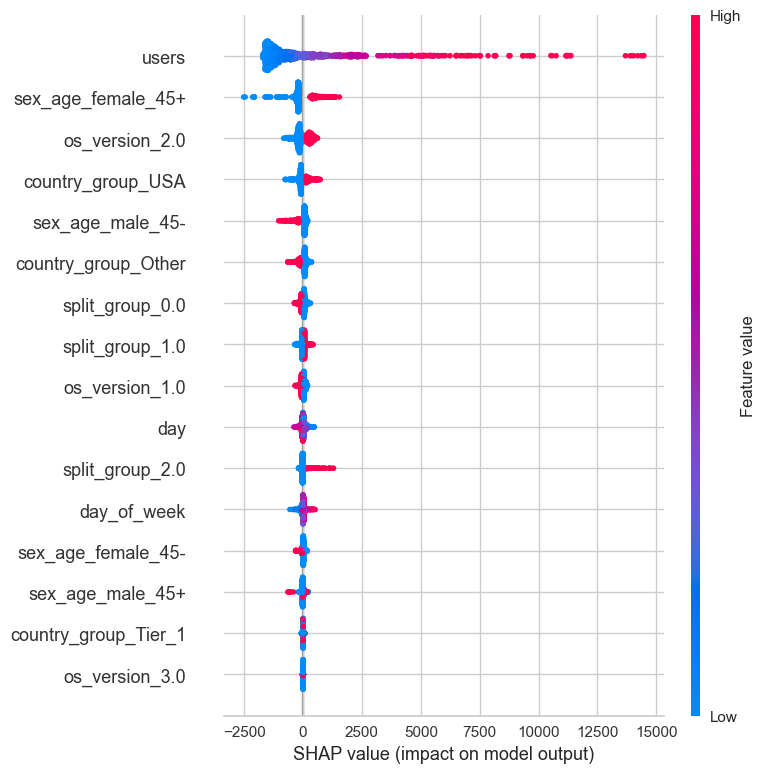

In [26]:
# Оцінка впливу факторів на прибуток
reg.interpret_model(model)

### Висновок

In [ ]:
Фактори, що найбільше впливають на прибуток (за пріорітетністю): 
    1. розмір груп дуже добре перехоплює те, що відбувається на різних етапах з продуктом (на графіку нижче це показано).
        оскільки кількість транзакцій за день виросла - це призвело до падіння її середньої ціни.
        тому люди до спліт-тесту вважаються більш платоспроможними за роботою моделі, але їх значущість невисока.
          2. стать (жінки "45+" рулять).
          3. версія OS (версія №2 приносить найбільший прибуток та має вплив на нього, а №1 та №3 - таке).
          4. група держав (США дає майстер клас. 
                          інші країни несуть гроші, якщо дивитися за графіком, але не так масштабно).
          5. спліт-тест (Група №1 більш схильна витрачати більше, аніж №0, що й за графіками на початку коду видно.
                          "split_group_2.0" стосується груп людей до A/B тесту, та й їх фінансову активність пояснено вище),
          6. під кінець тижня люди більш схильні витрачати, але під кінець місяця - ні.

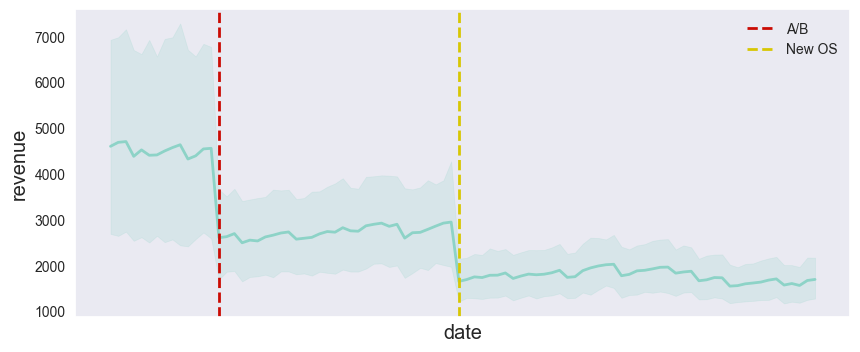

In [130]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(
    x='date',
    y='revenue',
    data=df,
    ax=ax
)
ax.axvline(x='2024-03-15', color='r', label='A/B', linestyle='--', linewidth=2)
ax.axvline(x='2024-04-15', color='y', label='New OS', linestyle='--', linewidth=2)
plt.legend()
plt.xticks([])
plt.show()

## Оцінка збитків

### Робота над оцінкою

In [143]:
# Оскільки відбулася аномалія - модель не здатна дуже добре прогнозувати саме такі відхилення в прибуках.
# Тому вона знадобиться для розрахунку значень "revenue" за умов, якщо б не було аномалії для оцінки збитків.
reg_pred = reg.predict_model(model, test)
reg_pred['diff'] = reg_pred['prediction_label'] - reg_pred['revenue']
reg_pred.sample(5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,448.6099,901772.8627,949.6172,0.7539,0.4924,0.5836


,date,users,split_group,gender,os_version,age_group,country_group,day_of_week,day,revenue,prediction_label,diff
4981,2024-05-28,1717,1.0,female,2,45+,Tier_1,Tuesday,28,7175.919922,8700.686369,1524.766447
4428,2024-05-21,412,0.0,male,3,45+,USA,Tuesday,21,1894.270020,1746.950895,-147.319125
5129,2024-05-30,213,1.0,female,2,45-,Other,Thursday,30,1342.329956,1319.014355,-23.315601
4605,2024-05-23,511,0.0,female,2,45-,USA,Thursday,23,2520.379883,2361.634746,-158.745137
4173,2024-05-17,598,0.0,female,2,45-,USA,Friday,17,1629.300049,2625.994664,996.694615


<Axes: xlabel='date', ylabel='revenue'>

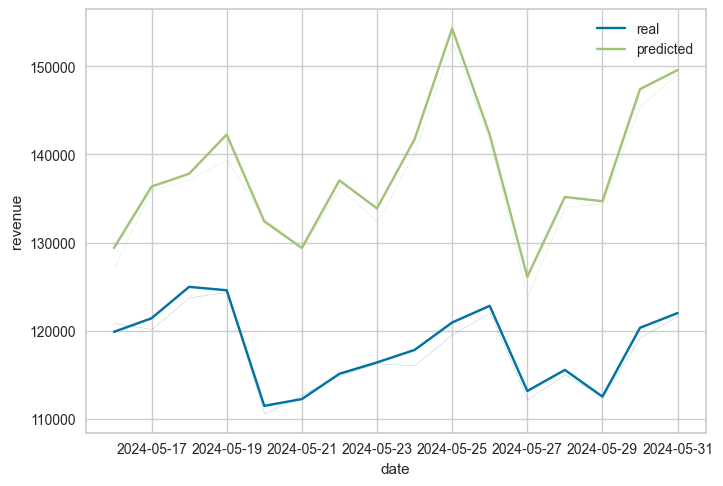

In [144]:
# Динаміка прибутку за умови реальних подій й без аномалії.
fig, ax = plt.subplots()
sns.lineplot(
    data=reg_pred,
    x='date',
    y='revenue',
    ax=ax,
    ci=False,
    estimator='sum',
    label='real')

sns.lineplot(
    data=reg_pred,
    x='date',
    y='prediction_label',
    ax=ax,
    ci=False,
    estimator='sum',
    label='predicted')

In [146]:
# Для того, щоб оцінити значення збитків
df_un = reg_pred.groupby('date', as_index=False)['diff'].sum()
df_un['day'] = df_un['date'].dt.day
df_un

,date,diff,day
0,2024-05-16,9521.679245,16
1,2024-05-17,14942.549425,17
2,2024-05-18,12833.146879,18
3,2024-05-19,17666.880924,19
4,2024-05-20,20936.173262,20
5,2024-05-21,17151.825005,21
6,2024-05-22,21938.347338,22
7,2024-05-23,17472.525170,23
8,2024-05-24,23901.114017,24
9,2024-05-25,33364.022463,25


In [147]:
# Лцнцйна регресія для пррогнозу збитків.
losses_un = sm.OLS(df_un['diff'], df_un['day']).fit()

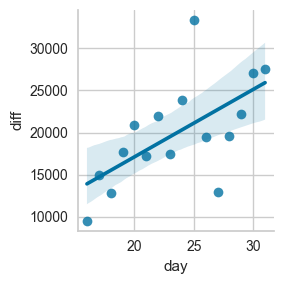

In [154]:
# Тренд збитків за осатнні 2 тижні.
sns.lmplot(
    data=df_un,
    x='day',
    y='diff',
    height=3
)

In [155]:
# Я припускаю, що з проблемуою будуть боротися приблизно тиждень,
# тому використав лінійну регреісю для оцінки збитків на наступні 7 днів.
pred_df = pd.DataFrame({'date':pd.date_range('2024-06-01', periods=7, freq='D'),
                         'day':np.arange(32,39,1)})
pred_df = pred_df.assign(
    losses = losses_un.predict(pred_df['day'])
)
pred_df

,date,day,losses
0,2024-06-01,32,27057.479146
1,2024-06-02,33,27903.025369
2,2024-06-03,34,28748.571593
3,2024-06-04,35,29594.117816
4,2024-06-05,36,30439.664039
5,2024-06-06,37,31285.210263
6,2024-06-07,38,32130.756486


### Висновок

In [159]:
# Загальні збитки
losses = df_un['diff'].sum() + pred_df['losses'].sum()
print(f'Загальні збитки на даний момент складають: {df_un["diff"].sum():.2f}$.\n Загальні прогнозовані збитки: {losses:.2f}$.')

Загальні збитки на даний момент складають: 318560.11$.
 Загальні прогнозовані збитки: 525718.93$.


## Загальний Висновок

In [ ]:
Фактори впливу:
1. "ОС" має значний вплив на прибуток, що можна побачити за візуалізацією "SHAP" та тим, як нова версія вплинула на прибуток.
2. Спліт-тест: Група №1 більш схильна витрачати гроші та й вона покращила прибутки новим функціоналом, що видно було ще на початкових графіках. 
3. Сезонність присутня, але вона просто дає розуміння, коли коистувач більш схильний витрачати свої гроші.

Цільова аудиторія:
1. Оскільки жіноча стать "45+" найбільше приносить грошей.
2. Оскільки США приносить найбільше грошей та їх аудиторія теж найбільша.
    Але треба розуміти, що аномалії в цих групах будуть значно погіршувати фінансове становище компанії, що можна побачити на графіках вище, адже це зумовлено їх часткою в загальній структурі активності.

Оцінка збитків:
Загальні збитки на даний момент складають: 318560.11$.
 Загальні прогнозовані збитки (якщо ще одну неділю буде аномалія): 525718.93$.